---

<h2 style="text-align: center;"><b>K Nearest Neighbors (KNN)</b></h2>

<img src='https://hsto.org/web/68d/a45/6f0/68da456f00f8434e87628dbe7e3f54a7.png' width=600>


Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:

* Вычислить расстояние до каждого из объектов обучающей выборки
* Отобрать объектов обучающей выборки, расстояние до которых минимально
* Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди $k$ ближайших соседей

Датасет (Описание): 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными.

### Обработка данных

In [9]:
import pandas as pd
import numpy as np

all_data = pd.read_csv('E:\\Project\\practice-loopa\\Machine Learning & Neural Network\\ML\\KNN sample\\forest_dataset.csv')
all_data.head()

0    1   2    3   4     5    6    7    8     9  ...  45  46  47  48  49  \
0  2683  333  35   30  26  2743  121  173  179  6572  ...   0   0   0   0   0   
1  2915   90   8  216  11  4433  232  228  129  4019  ...   0   0   0   0   0   
2  2941  162   7  698  76  2783  227  242  148  1784  ...   0   0   0   0   0   
3  3096   60  17  170   3  3303  231  202   99  5370  ...   0   0   0   0   0   
4  2999   66   8  488  37  1532  228  225  131  2290  ...   0   0   0   0   0   

   50  51  52  53  54  
0   0   0   0   0   2  
1   0   0   0   0   1  
2   0   0   0   0   2  
3   0   0   0   0   1  
4   0   0   0   0   2  

[5 rows x 55 columns]

метки класса -`labels`, 
признаковые описания - `feature_matrix`. (Перевод в `numpy`-формат с помощью метода `.values`)

In [10]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

`sklearn`: выборки имеют вид пар $(X, y)$, $X$ -- матрица признаков, $y$ -- вектор истинных значений целевой переменной
(или $X$, если целевые переменные неизвестны)

[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- разбивает выборку на обучающую и тестовую части.

In [11]:
from sklearn.model_selection import train_test_split

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

(*Прим.* Параметр `test_size` контролирует, какая часть выборки будет тестовой)

Основные объекты `sklearn` -- `estimators`(*оценщики*). По сути это *модели*, делятся на **классификаторы** и **регрессоры**.

Модели: классификаторы
[метод ближайших соседей](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) и 
[логистическую регрессию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

(*Прим.* У всех моделей в `sklearn` обязательно должно быть хотя бы `fit` и `predict`)

`fit(X, y)` - обучение модели, принимает на вход обучающую выборку в виде *матрицы признаков* $X$ и *вектора ответов* $y$.

У обученной после `fit` модели теперь можно вызывать метод `predict(X)`, который вернёт предсказания этой модели на всех объектах из матрицы $X$ в виде вектора.

(Вызывать `fit` у одной и той же модели можно несколько раз, каждый раз она будет обучаться заново на переданном наборе данных)

*Пример* Логистическая регрессия

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1) # C - гиперпараметр

clf.fit(train_feature_matrix, train_labels) # обучение модели

y_pred = clf.predict(test_feature_matrix) # предсказание

C:\Users\Lenovo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


`score(X, y)` - расчет какой-либо функции ошибки на выборке $X, y$, (зависит от модели). Также можно использовать одну из функций модуля `metrics`, например [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, y_pred)

0.6075

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) - осуществляет поиск (search) по сетке гиперпараметров (grid) и вычисляет качество модели с помощью кросс-валидации (CV).

(У логистической регрессии, например, можно поменять параметры `C` и `penalty`)

In [14]:
from sklearn.model_selection import GridSearchCV

# указали солвер 'saga' - работает с регуляризациями None, l1, l2, elastic
clf = LogisticRegression(solver='saga')

param_grid = {
    'C': np.arange(1, 5), 
    'penalty': ['l1', 'l2'],
}

# создадим объект GridSearchCV
search = GridSearchCV(clf, param_grid, n_jobs=-1, cv=5, refit=True, scoring='accuracy')

# запустим поиск
search.fit(feature_matrix, labels)

# выведем наилучшие параметры
print(search.best_params_)

{'C': 2, 'penalty': 'l1'}


C:\Users\Lenovo\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [15]:
accuracy_score(labels, search.best_estimator_.predict(feature_matrix))

0.642

(передаём в GridSearchCV всю выборку. Однако иногда отделяют *валидационную* часть, так как гиперпараметры в процессе поиска могли переобучиться под выборку)

### Обучение модели

Параметры

* число соседей `n_neighbors`
* метрика расстояния между объектами `metric`
* веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос") `weights`


In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

all_data = pd.read_csv('E:\\Project\\practice-loopa\\Machine Learning & Neural Network\\ML\\KNN sample\\forest_dataset.csv')

# target variable is last (54)

target = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

train_feature_matrix, test_feature_matrix, train_target, test_target = train_test_split(feature_matrix, target, test_size=0.2, random_state=42)

# KNN on 10 neighbours

classificator = KNeighborsClassifier(n_neighbors=10)

classificator.fit(train_feature_matrix, train_target)
prediction = classificator.predict(test_feature_matrix)

print(accuracy_score(test_target, prediction))



0.716


* от `1` до `10` параметр числа соседей

* метрики: `['manhattan', 'euclidean']`

* стратегии вычисления весов: `[‘uniform’, ‘distance’]`

In [17]:
from sklearn.model_selection import GridSearchCV
# Try GridSearchCV

param_grid = {
    'n_neighbors': np.arange(1, 12),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'manhattan', 'euclidean']
}

cv_search = GridSearchCV(classificator, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
cv_search.fit(feature_matrix, target)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

Выведем лучшие параметры

In [18]:
cv_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [19]:
optimal_clf = KNeighborsClassifier(n_neighbors=4, metric='manhattan', weights='distance')
optimal_clf.fit(train_feature_matrix, train_target) 
pred_prob = optimal_clf.predict(test_feature_matrix)

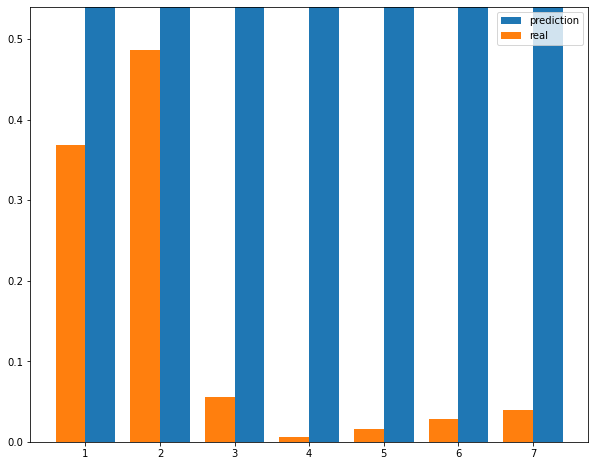

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

unique, freq = np.unique(test_labels, return_counts=True)
freq = list(map(lambda x: x / len(test_labels),freq))

pred_freq = pred_prob.mean(axis=0)
plt.figure(figsize=(10, 8))
plt.bar(range(1, 8), pred_freq, width=0.4, align="edge", label='prediction')
plt.bar(range(1, 8), freq, width=-0.4, align="edge", label='real')
plt.ylim(0, 0.54)
plt.legend()
plt.show()